In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import matplotlib as mpl
sys.path.append('../python/')
os.environ['MPLCONFIGDIR'] = '../mplstyles'


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

import numpy as np
#set up a plot 
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

# Joint Distributions of Q and $\tilde{E}_r$ to Compare to Edelweiss Paper

The purpose of this notebook is to detail the computation of the joint distribution of Q and $\tilde{E}_r$ (measured ionization yield and measured recoil energy) with and arbitrary effective Fano factor applied. The construction used here is different from the one of Arvind, but it is verified to produce the same results for the probability distribution in ionization yield (called "Q" by Edelweiss) at a given fixed true recoil energy. 

Here is a table of the variables used in computing the distribution. I match Edelweiss variable names where possible.

variable/constant name|Description 
:-|:-
Q|measured ionization yield (CDMS calls this "Y")
$\tilde{E}_r$|measured recoil energy
N|number of e/h pairs
$\delta I$ | instrumental fluctuation on the ionization measurement
$\delta H$ | instrumental fluctuation on the heat measurement
$E_r$ | true recoil energy
$\epsilon$ | average energy to create a single electron-hole pair for an electron-recoil in keV
$V$ |voltage across the detector in Volts
F | effective Fano factor for nuclear-recoils

We seek the joint distribution of Q and $\tilde{E}_r$ given a fixed true energy, $E_r$. It is equal to the 5-variable joint distribution integrated appropriately over the 3 unwanted variables. 

\begin{equation}
P(Q,\tilde{E}_r | E_r) = \int_{-\infty}^{\infty} d(\delta H) \int_{-\infty}^{\infty} d(\delta I) \int_0^{\infty} dN
 P(Q,\tilde{E}_r,\delta H,\delta I, N | E_r)
\end{equation}

The technique used is to write down the 5-variable joint distribution based on the rules of conditional probability and the fact that N, $\delta I$, and $\delta H$ are independent random variables. Then the appropriate integrals can be carried out analytically or numerically. 

## Resolutions and the Conditional Distribution

In addition to the variables already defined we need some kind of specifications for the (assumed Gaussian) resolutions on the three fundamental measured variables: N, $\delta I$, and $\delta H$. The resolutions are denoted $\sigma_N$, $\sigma_I$, and $\sigma_H$ respectively, and are assumed to be functions of the true recoil energy $E_r$.

Both the $\sigma_I(E_r)$ and the $\sigma_H(E_r)$ are just the measured resolutions from Edelweiss paper [REF]. 

The $\sigma_N$ is the standard deviation of the number of electron-hole pairs, which can be computed (for a fixed $E_r$) using the effective Fano factor F. It is given simply by:

\begin{equation}
\sigma_N(E_r) = \sqrt{F(\bar{Q}E_r/\epsilon)},
\end{equation}

Where $\bar{Q}$ is the mean ionization yield at $E_r$. Whenever $\bar{Q}$ is written it is tacitly assumed to be a function of the true recoil energy, $E_r$.

We plot the Edw. resolutions just below, for detector GGAl10. 

In [2]:
#start getting the resolutions
import EdwRes as er

heatRes_GGAl10 = er.get_heatRes_func(0.4, 3.5)
#print(heatRes_GGAl10(122))
sigI_GGAl10 = er.get_ionRes_func(1.1, 1.3, 2.8)
#print(sigI_GGAl10(10))

sigh_GGAl10v = np.vectorize(heatRes_GGAl10)
sigi_GGAl10v = np.vectorize(sigI_GGAl10)

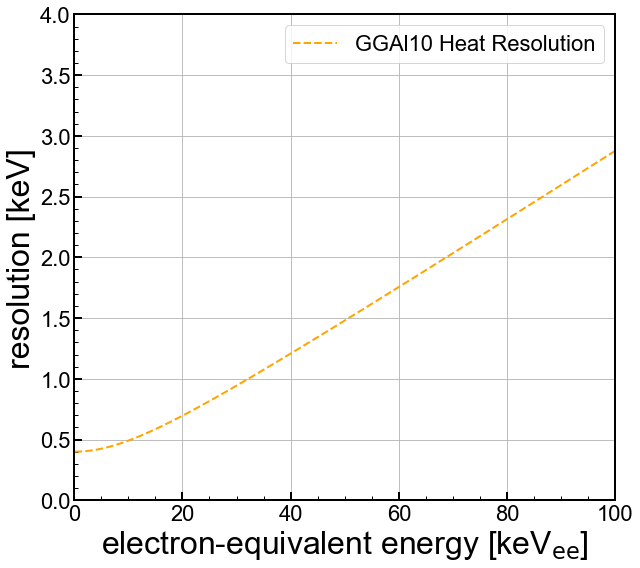

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(0.1,100,0.1)

ax1.plot(X,sigh_GGAl10v(X),color='orange',linestyle='--',label='GGAl10 Heat Resolution')


#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)

ymin = 0
ymax = 4

ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'electron-equivalent energy [keV$_{\mathrm{ee}}$]',**axis_font)
ax1.set_ylabel('resolution [keV]',**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

Since the resolutions are now known, we turn to the construction of the conditional probability $P(Q,\tilde{E}_r,\delta H, \delta I,N|E_r)$. We base this on the fact that the variables Q, $\tilde{E}_r$ are _completely derived_ variables and that the random variables N, $\delta I$, and $\delta H$ are _totally independent_. 

Q and $\tilde{E}_r$ are constructed from N, $\delta I$, $\delta H$, and $E_r$ by the following equations:

\begin{equation}
\tilde{E}_r = E_r + \left(1 + \frac{V}{\epsilon}\right)\delta H - \left(\frac{V}{\epsilon}\right) \delta I,
\end{equation}

\begin{equation}
Q = \frac{\epsilon N + \delta I}{E_r + \left(1 + \frac{V}{\epsilon} \right) \delta H - \left(\frac{V}{\epsilon}\right) \delta I}.
\end{equation}

With these equations we can simply write down the highly-conditional joint distribution since the variables Q and $\tilde{E}_r$ contain no information except that which is contained in the other variables. 

\begin{equation}
P(Q,\tilde{E}_r | \delta H, \delta I, N, E_r) = \delta_r\left(\tilde{E}_r - \left[E_r + \left(1+\frac{V}{\epsilon}\right)\delta H -\left(\frac{V}{\epsilon}\right)\delta I\right] \right) \delta_Q \left(Q - \left[\frac{\epsilon N + \delta I}{E_r + \left(1+V/\epsilon\right)\delta H - (V/\epsilon) \delta I}\right]\right),
\end{equation}

where $\delta_r$ and $\delta_Q$ represent Dirac delta function distributions of the listed variables. 

After that we can just construct the needed conditional probability by multiplying by the probability distributions of the independent random variables N, $\delta H$, and $\delta I$. 

\begin{equation}
P(Q,\tilde{E}_r,\delta H, \delta I, N|E_r) = P(Q,\tilde{E}_r|\delta H,\delta I, N, E_r)P(\delta H)P(\delta I)P(N)
\end{equation}

## The 5-Variable Joint Distribution

The 5-variable joint distribution can now simply be written down, because the probability distributions of all of the independent random variables are just Gaussian. 

\begin{equation}
P(Q,\tilde{E}_r,\delta H, \delta I, N|E_r) = N_{IHN} \delta_Q \delta_r exp\left[-\frac{\delta I^2}{2\sigma_I^2}\right]exp\left[-\frac{\delta H^2}{2\sigma_H^2}\right]exp\left[-\frac{\left(\bar{N} - N\right)^2}{2\sigma_N^2}\right],
\end{equation}

where $\bar{N}$ is the mean number of electron-hole pairs and is equal to $\bar{Q}E_r/\epsilon$, and $N_{IHN}$ is a conglomeration of all the factors that do not depend on the independent random variables, as below:

\begin{equation}
N_{IHN} = \frac{1}{\sqrt{2\pi\sigma_I^2}}\frac{1}{\sqrt{2\pi\sigma_H^2}}\frac{1}{\sqrt{2\pi\sigma_N^2}},
\end{equation}

Note that this _is_ a function of the true recoil energy, $E_r$. Now to get the analytical representation of the function we want, $P(Q,\tilde{E}_r|E_r)$, we need to integrate over $\delta H$, N, and $\delta I$ as described above. 

### Integrating Over $\delta H$

Because of the Dirac delta function $\delta_r$, this integral is fairly trivial. Since in the delta function we have the factor $\left(1+ (V/\epsilon)\right)$ preceding the $\delta H$ we need to do a change-of-variable to use the delta function in the most straight-forward way. Let's do:

\begin{equation}
\begin{aligned}
\chi_0 &\equiv \left(1+(V/\epsilon)\right) \delta H \\
d\chi_0 &= \left(1+(V/\epsilon)\right) d(\delta H).
\end{aligned}
\end{equation}

This will modify the distribution by a constant factor in addition to eliminating $\delta H$. The result is:

\begin{equation}
P(Q,\tilde{E}_r, \delta I, N|E_r) = \frac{N_{IHN}}{1+\left(\frac{V}{\epsilon}\right)} \delta_Q \delta_r exp\left[-\frac{\delta I^2}{2\sigma_I^2}\right]exp\left[-\frac{\left(\tilde{E}_r - E_r + (V/\epsilon) \delta I\right)^2}{2\left[\left(1+(V/\epsilon)\right)\sigma_H\right]^2}\right]exp\left[-\frac{\left(\bar{N} - N\right)^2}{2\sigma_N^2}\right],
\end{equation}

### Integrating Over N

### Integrating Over $\delta I$

## Joint Distribution in Q, $\tilde{E}_r$ for a Fixed $E_r$

## Adding in the True $E_r$ Distribution